Exercise Set 5

Mohaddeseh Mozaffari

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
from numba import njit
sns.set()

In [2]:
#load data in data_5
data1 = np.loadtxt("Data_5/0.2.txt")
data2 = np.loadtxt("Data_5/0.5.txt")
data3 = np.loadtxt("Data_5/0.8.txt")

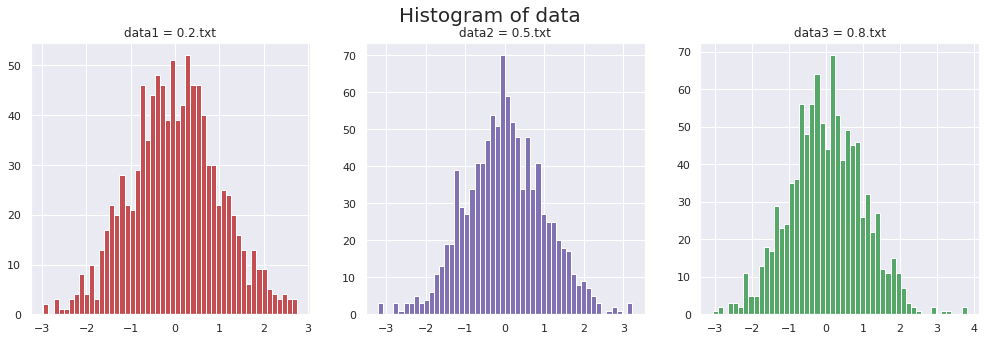

In [3]:
#plot histogram of the data
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].hist(data1, bins=50, color="r")
axs[0].set_title("data1 = 0.2.txt")

axs[1].hist(data2, bins=50, color="m")
axs[1].set_title("data2 = 0.5.txt")

axs[2].hist(data3, bins=50, color="g")
axs[2].set_title("data3 = 0.8.txt")

fig.suptitle("Histogram of data", fontsize=20)
plt.show()

# Q1:

In [4]:
#number of moment and cumulant that want to calculate
n_m = [1, 2, 3, 4, 5, 10]
n_k = [1, 2, 3, 4, 5, 6, 10]

In [5]:
def moment(x,k):
    """calculate kth central moment of x data

    Args:
        x (array_like): data
        k (int): order of central moment

    Returns:
        float: k-th central moment
    """
    return np.mean((x)**k)

In [6]:
def cumulant(x, k, M):  
    """calculate kth cumulant of x data

    Args:
        x (array_like): data
        k (int): order of cumulant

    Returns:
        float: k-th cumulant
    """
    K = np.zeros((k,k))
    for n in range(1,k+1):
        K[n-1, 0] = M(x,n) 
        for i in range(1, n):
            K[n-1, i] = comb(n-1, n-i) * M(x,n-i)
        if n != k:
            K[n-1, n] = 1

    return  ((-1)**(k-1)) * np.linalg.det(K)

In [7]:
#find moment for 3 data
Moment1, Moment2, Moment3 = [], [], []
for n in n_m:
    Moment1.append(moment(data1, n))
    Moment2.append(moment(data2, n))
    Moment3.append(moment(data3, n))

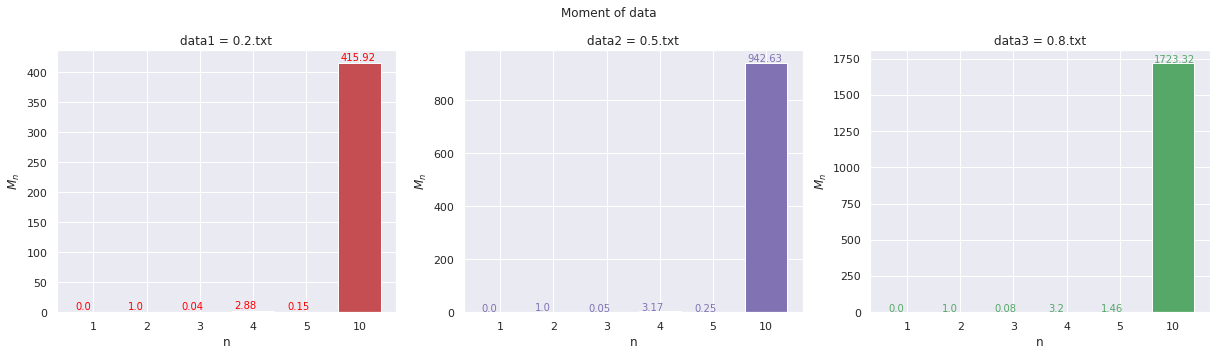

In [8]:
#plot the values of moment for datas
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].bar([str(i) for i in n_m], Moment1, color="r")
axs[0].set_title("data1 = 0.2.txt")
axs[0].set_xlabel("n")
axs[0].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment1):
    axs[0].text(i-.35,v+4, str(round(v,2)), color='red')

axs[1].bar([str(i) for i in n_m], Moment2, color="m")
axs[1].set_title("data2 = 0.5.txt")
axs[1].set_xlabel("n")
axs[1].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment2):
    axs[1].text(i-.35,v+4, str(round(v,2)), color='m')

axs[2].bar([str(i) for i in n_m], Moment3, color="g")
axs[2].set_title("data3 = 0.8.txt")
axs[2].set_xlabel("n")
axs[2].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment3):
    axs[2].text(i-.35,v+4, str(round(v,2)), color='g')

fig.suptitle("Moment of data")
plt.tight_layout()
plt.show()

In [9]:
#calculate cumulant for datas
Cumulant1, Cumulant2, Cumulant3 = [], [], []
for n in n_k:
    Cumulant1.append(cumulant(data1, n, moment))
    Cumulant2.append(cumulant(data2, n, moment))
    Cumulant3.append(cumulant(data3, n, moment))

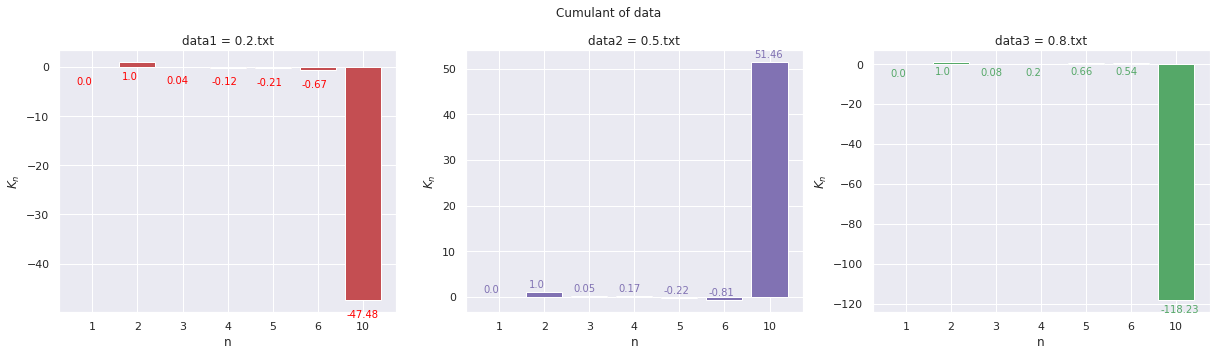

In [10]:
#plot the cumulants of datas
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].bar([str(i) for i in n_k], Cumulant1, color="r")
axs[0].set_title("data1 = 0.2.txt")
axs[0].set_xlabel("n")
axs[0].set_ylabel(r"$K_n$")

for i, v in enumerate(Cumulant1):
    axs[0].text(i-.35,v-3.5, str(round(v,2)), color='red')
    
axs[1].bar([str(i) for i in n_k], Cumulant2, color="m")
axs[1].set_title("data2 = 0.5.txt")
axs[1].set_xlabel("n")
axs[1].set_ylabel(r"$K_n$")
for i, v in enumerate(Cumulant2):
    axs[1].text(i-.35,v+1, str(round(v,2)), color='m')

axs[2].bar([str(i) for i in n_k], Cumulant3, color="g")
axs[2].set_title("data3 = 0.8.txt")
axs[2].set_xlabel("n")
axs[2].set_ylabel(r"$K_n$")
for i, v in enumerate(Cumulant3):
    axs[2].text(i-.35,v-6, str(round(v,2)), color='g')

fig.suptitle("Cumulant of data")
plt.tight_layout()
plt.show()

# Q2:

In [11]:
def skewness(x):
    """calculate skewness of data

    Args:
        x (array_like): data

    Returns:
        float: skewness of data
    """
    return np.mean((x-x.mean())**3)

In [12]:
def kurtosis(x):
    """calculate kurtosis of data

    Args:
        x (array_like): data

    Returns:
        float: kurtosis of data
    """
    m2 = np.mean(x**2)
    m4 = np.mean(x**4)
    return m4 / (m2**2)

In [13]:
print("The skewness of data 1 is", skewness(data1))
print("The skewness of data 2 is", skewness(data2))
print("The skewness of data 3 is", skewness(data3))

The skewness of data 1 is 0.03562410826680136
The skewness of data 2 is 0.04754127376432882
The skewness of data 3 is 0.08001875525507664


In [14]:
print("The kurtosis of data 1 is", kurtosis(data1))
print("The kurtosis of data 2 is", kurtosis(data2))
print("The kurtosis of data 3 is", kurtosis(data3))

The kurtosis of data 1 is 2.880808301142841
The kurtosis of data 2 is 3.1674377255966975
The kurtosis of data 3 is 3.204739567661185


# Q3:
## A:

In [2]:
data = np.loadtxt("0.800")
data

array([[ 1.00000000e+00,  1.02577223e-01],
       [ 2.00000000e+00, -8.85575575e-01],
       [ 3.00000000e+00, -9.97431011e-01],
       ...,
       [ 6.55340000e+04, -6.02874431e-01],
       [ 6.55350000e+04,  5.36658614e-02],
       [ 6.55360000e+04,  9.21246424e-01]])

In [3]:
x = data[:,0]
y = data[:,1]

In [4]:
def _int(x):
    """calculate integer part of the number 
    example:
        _float(-0.5) = -1

    Args:
        x (float): 

    Returns:
        int: 
    """
    if x>= 0:
        return int(x)
    else:
        return int(x) -1

In [5]:
def PDF(X,dx):
  """probability of data

  Args:
      X (1d_array): data
      dx (float): size of steps

  Returns:
      tuple: axis of probability and probability --> x, p(x)
  """
  n = int((X.max()-X.min())/dx) + 1
  
  axis = np.linspace(X.min(), X.max(), n)

  pdf = np.zeros(n)

  X -= X.min()

  for i in range(len(X)):
    k = _int(X[i]/dx)
    pdf[k] += 1     

  pdf /= (np.sum(pdf)*dx)  

  return axis,pdf 

In [6]:
def p_joint(x, y, dx, dy, nx=0, ny=1, tau=0):
    """calculate joint probablity --> p(x(t+nx*tau),y(t+ny*tau))

    Args:
        x (1d_array): first data
        y (1d-array): second data
        dx (float): size of steps for x data
        dy (float): size of steps for y data
        nx (int, optional): coefficient of tau for x. Defaults to 0.
        ny (int, optional): coefficient of tau for x. Defaults to 1.
        tau (int, optional): delay time. Defaults to 0.
    Returns:
        2d_array: joint probability of x,y
    """

    numx = int((x.max()-x.min())/dx)+1
    numy = int((y.max()-y.min())/dy)+1

    pdf = np.zeros((numx, numy))

    x -= x.min()
    y -= y.min()

    for i in range(len(x)- np.max((nx,ny))*tau):
        k1 = _int(x[i+(nx*tau)]/dx)
        k2 = _int(y[i+(ny*tau)]/dy)
        pdf[k1,k2] += 1

    return pdf/(np.sum(pdf)*dx*dy)

In [106]:
delta_tau = []
dx = 100
dy = 0.01
x_p = PDF(x,dx)[1]
y_p = PDF(y,dy)[1]
for t in range(1000):
    d = 0
    joint_p = p_joint(x,y,dx,dy,tau=t)
    for i in range(len(x_p)):
        for j in range(len(y_p)):
            d += abs(joint_p[i,j] - (x_p[i] * y_p[j]))
    delta_tau.append(d)

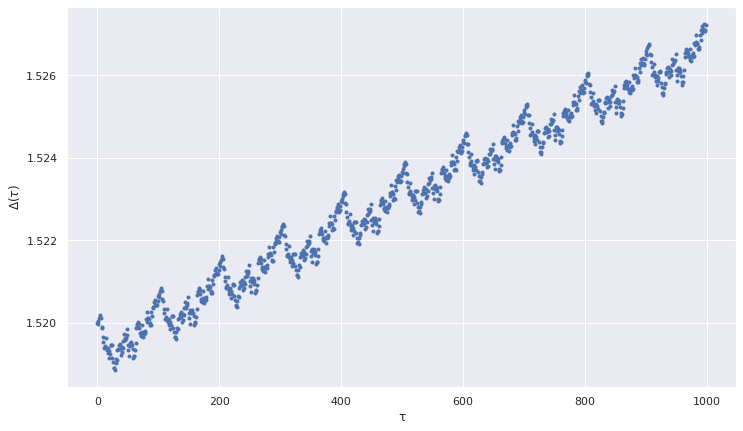

In [114]:
plt.figure(figsize=(12,7))
plt.plot(delta_tau, ls="", marker=".")
plt.xlabel('τ')
plt.ylabel(r'$\Delta(τ)$')
plt.show()

## B:

In [ ]:
dy = 0.01
joint_p = p_joint(y,y,dy,dy,2,0,tau=t)
y_p = PDF(y,dy)[1]


# Q4:

In [15]:
def GenerateNormal():
  """generate normal distribution from uniform dist. with BoX Muller algorithm

  Returns:
      float: random variable with normal distiribution
  """
  u1, u2 = np.random.uniform(0, 1, 2)
  z1 = ((-2*np.log(u1))**(0.5))* np.cos(2*np.pi*u2)
  z2 = ((-2*np.log(u2))**(0.5))* np.sin(2*np.pi*u1)
  return z1,z2

In [16]:
normal = []
for i in range(100000):
  z1,z2 = GenerateNormal()
  normal.append(z1)
  normal.append(z2)

In [17]:
#tranfor normal dist, to guassian dist. with the mean is 3 and the variance is 2
guassian = np.array(normal)* np.sqrt(2) + 3

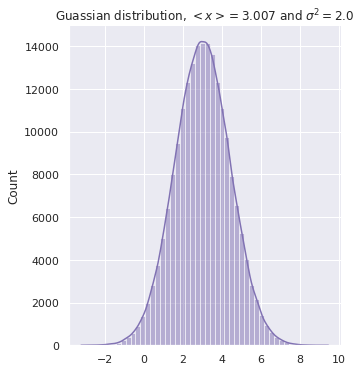

In [18]:
sns.displot(guassian, kde=True, bins= 50, color="m", )
plt.title(rf'Guassian distribution, $<x> = ${round(guassian.mean(),3)} and $ \sigma^2 = {round(guassian.var(),3)}$')
plt.show()

# Q5:

In [19]:
def p(x):
    """probability

    Args:
        x (float):
    """
    return np.sin(x**2/100) + 1/(np.cos(x**3/100)) + x**(-3)
p = np.vectorize(p)                      

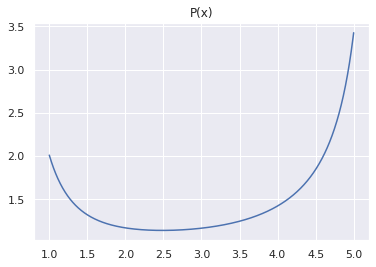

In [20]:
X = np.linspace(1,5,1000)
Prob = p(X)
w = Prob.max()
plt.plot(X, Prob)
plt.title("P(x)")
plt.show()

In [21]:
#generate random number from p(x) distrinution according to Von-Neumann alghorithm
XX = []
for i in range(10**5):
    x = np.random.uniform(1,5)
    y = np.random.uniform(0,w)
    P = p(x)
    if y <= P:
        XX.append(x)


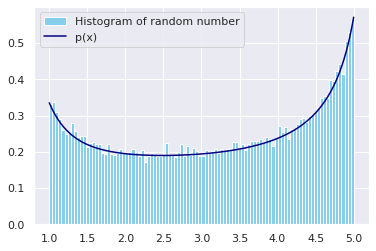

In [22]:
plt.hist(XX, bins=100, density=True, color="skyblue", label="Histogram of random number")
plt.plot(X, Prob/6, color="navy", label="p(x)")
plt.legend()
plt.show()

# Q6:

![image](/home/mohaddeseh/Documents/Programing/Computational/HW5/Q6.jpg)


# Q7:

![image](/home/mohaddeseh/Documents/Programing/Computational/HW5/Q7.jpg)


# Q8:

In [23]:
data = np.loadtxt("data.txt")
r = len(data)%100 
splited_data = np.array(np.array_split(data[r:], 100))  #for equal length

In [26]:
@njit
def corr(data):
    """compute correlation matrix

    Args:
        data (2d_array): data

    Returns:
        2d_array: correlation
    """
    n = data.shape[1]
    C = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            C[i,j] = np.mean(data[:,i]*data[:,j])
            C[j,i] = C[i,j]
    return C

In [27]:
C = corr(splited_data)

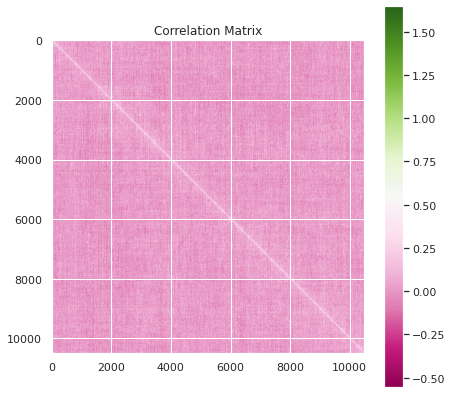

In [31]:
plt.figure(figsize=(7,7))
plt.imshow(C, cmap="PiYG")
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

In [40]:
c1, c2, c3, c4, c5 = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
#5 sets of data
x1 = splited_data[93]
x2 = splited_data[34]
x3 = splited_data[18]
x4 = splited_data[40]
x5 = splited_data[88]

for tau in range(0,n):
    for i in range(n-tau):
        c1[tau] +=  x1[i]*x1[i+tau]
        c2[tau] +=  x2[i]*x2[i+tau]
        c3[tau] +=  x3[i]*x3[i+tau]
        c4[tau] +=  x4[i]*x4[i+tau]
        c5[tau] +=  x5[i]*x5[i+tau]
    c1[tau] /= n-tau
    c2[tau] /= n-tau
    c3[tau] /= n-tau
    c4[tau] /= n-tau
    c5[tau] /= n-tau

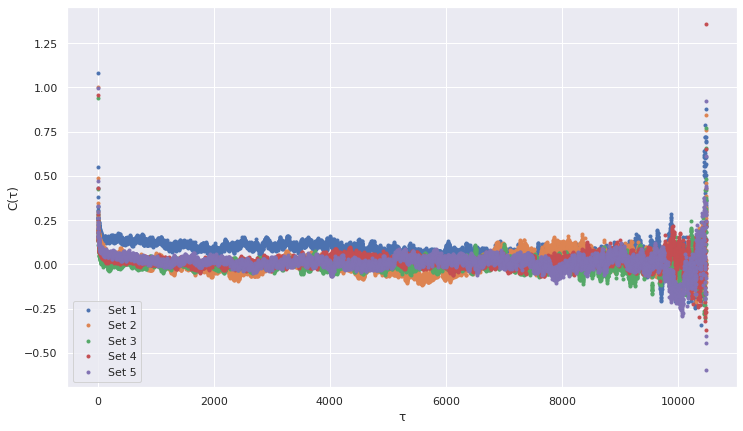

In [52]:
plt.figure(figsize=(12,7))
plt.plot(c1, label='Set 1', ls="", marker=".")
plt.plot(c2, label='Set 2', ls="", marker=".")
plt.plot(c3, label='Set 3', ls="", marker=".")
plt.plot(c4, label='Set 4', ls="", marker=".")
plt.plot(c5, label='Set 5', ls="", marker=".")
plt.xlabel('τ')
plt.ylabel('C(τ)')
plt.legend()
plt.show()

# Q9:

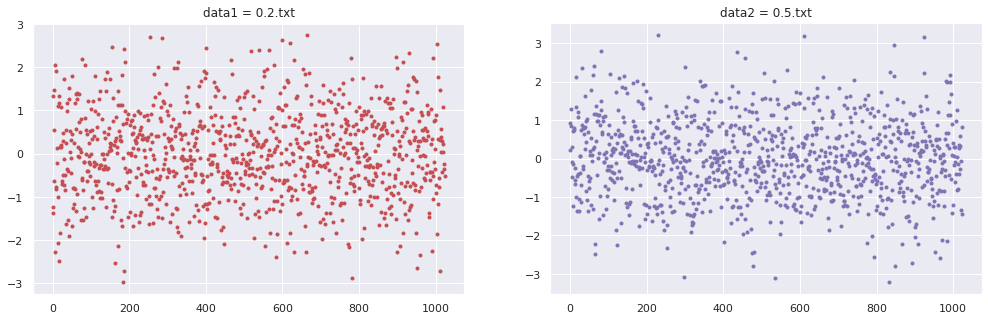

In [56]:
#plot the data
fig, axs = plt.subplots(1,2, figsize=(17,5))

axs[0].plot(data1, ".r", )
axs[0].set_title("data1 = 0.2.txt")

axs[1].plot(data2, ".m")
axs[1].set_title("data2 = 0.5.txt")

plt.show()

In [147]:
def pearson_coef(x,y):
    """calculate pearson coefficent

    Args:
        x (array_like): data
        y (array_like): data

    Returns:
        float: pearson coefficent
    """
    return np.mean((x-np.mean(x))* (y-np.mean(y))) / np.sqrt(np.var(x)*np.var(y))

In [63]:
print("The degree of correlation between 0.2.txt and 0.5.txt is", pearson_coef(data1,data2))
print("The degree of correlation between 0.2.txt and itself is", pearson_coef(data1,data1))
print("The degree of correlation between 0.5.txt and itself is", pearson_coef(data2,data2))

The degree of correlation between 0.2.txt and 0.5.txt is 0.0804956891229922
The degree of correlation between 0.2.txt and itself is 1.0
The degree of correlation between 0.5.txt and itself is 1.0


# Q10:

In [69]:
n = len(data1)
C1, C2, C3 = np.zeros(n), np.zeros(n), np.zeros(n)
for tau in range(0,n):
    for i in range(n-tau):
        C1[tau] +=  data1[i]*data1[i+tau]
        C2[tau] +=  data2[i]*data2[i+tau]
        C3[tau] +=  data3[i]*data3[i+tau]

    C1[tau] /= n-tau
    C2[tau] /= n-tau
    C3[tau] /= n-tau

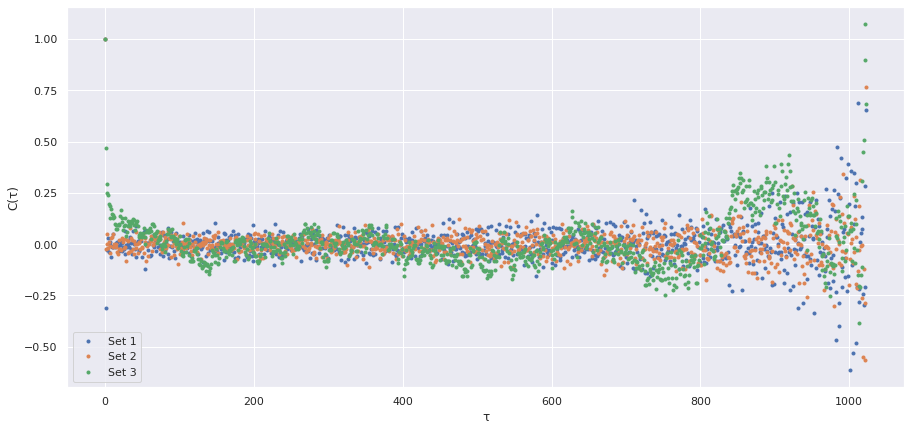

In [71]:
plt.figure(figsize=(15,7))
plt.plot(C1, label='Set 1', ls="", marker=".")
plt.plot(C2, label='Set 2', ls="", marker=".")
plt.plot(C3, label='Set 3', ls="", marker=".")

plt.xlabel('τ')
plt.ylabel('C(τ)')
plt.legend()
plt.show()

For all three datasets, $C (\tau) $ is almost equal to zero. So they are uncorrelated.

# Q11:

\begin{equation}
I(X; Y) = H(X) + H(Y) − H(X, Y),
\end{equation}

\begin{equation}
H(X) = − \Sigma_{i=1}^L p_i \ln p_i,
\end{equation}

\begin{equation}
H(X, Y) = − \Sigma_{i=1}^L  \Sigma_{j=1}^M p_{ij} \ln p_{ij}.
\end{equation}

In [124]:
#set step size
dx = 0.01

In [125]:
#calculate probability of datasets according to PDF function in Q3
axis_data1, p_data1 = PDF(data1, dx)
axis_data2, p_data2 = PDF(data2, dx)
axis_data3, p_data3 = PDF(data3, dx)

In [126]:
#calculate joint probability of datasets according to p_joint function in Q3
p_12 = p_joint(data1, data2, dx, dx, ny=0)
p_13 = p_joint(data1, data3, dx, dx, ny=0)
p_23 = p_joint(data2, data3, dx, dx, ny=0)

In [135]:
def H(prob):
    """entropy

    Args:
        prob (nd_array): probability

    Returns:
        float: entropy
    """
    h = 0
    for p in prob.flatten():
        if p != 0:
            h += p*np.log(p)
    return -h

In [140]:
#compute entropy
h1 = H(p_data1)
h2 = H(p_data2)
h3 = H(p_data3)
h12 = H(p_12)
h13 = H(p_13)
h23 = H(p_23)

In [144]:
#compute mutual information
I12 = h1 + h2 - h12
I13 = h1 + h3 - h13
I23 = h2 + h3 - h23

In [146]:
print("The mutual information between 0.2.txt and 0.5.txt is", I12)
print("The mutual information between 0.2.txt and 0.8.txt is", I13)
print("The mutual information between 0.5.txt and 0.8.txt is", I23)

The mutual information between 0.2.txt and 0.5.txt is 23040.28183708713
The mutual information between 0.2.txt and 0.8.txt is 23104.788649055798
The mutual information between 0.5.txt and 0.8.txt is 23067.721903333804


# Q12:

In [148]:
#use pearson_coef function of Q9
pc12 = pearson_coef(data1, data2)
pc13 = pearson_coef(data1, data3)
pc23 = pearson_coef(data2, data3)

In [151]:
print("The pearson's coeficent between 0.2.txt and 0.5.txt is", pc12)
print("The pearson's coeficent between 0.2.txt and 0.8.txt is", pc13)
print("The pearson's coeficent between 0.5.txt and 0.8.txt is", pc23)

The pearson's coeficent between 0.2.txt and 0.5.txt is 0.08049568912299221
The pearson's coeficent between 0.2.txt and 0.8.txt is -0.020389936658351003
The pearson's coeficent between 0.5.txt and 0.8.txt is -0.0156085973117271


In [187]:
def spearman_coef(x, y):
    rank_x = (-x).argsort()+1
    rank_y = (-y).argsort()+1
    d = rank_x - rank_y
    N = len(x)
    return 1 - ((6* np.sum(d**2)) / (N*(N**2-1)))


In [195]:
sc12 = spearman_coef(data1,data2)
sc13 = spearman_coef(data1,data3)
sc23 = spearman_coef(data2,data3)

In [198]:
print("The Spearman's coeficent between 0.2.txt and 0.5.txt is", sc12)
print("The Spearman's coeficent between 0.2.txt and 0.8.txt is", sc13)
print("The Spearman's coeficent between 0.5.txt and 0.8.txt is", sc23)

The Spearman's coeficent between 0.2.txt and 0.5.txt is -0.04522486991273866
The Spearman's coeficent between 0.2.txt and 0.8.txt is 0.04098728855232103
The Spearman's coeficent between 0.5.txt and 0.8.txt is 0.010495605643373151


We know that a positive value for either coefficient indicates a positive relationship between the two variables, while a negative value indicates a negative relationship. The magnitude of the coefficient indicates the strength of the relationship; a coefficient of 1 indicates a perfect positive relationship, while a coefficient of -1 indicates a perfect negative relationship. In this question, all Spearman's and Pearson's coefficients are near zero, so they have no correlation with each other.